In [118]:
import datetime
import math
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#matplotlib inline
import pyproj
import pymap3d as pm

from astropy.time import Time



In [129]:
## input data
data = pd.read_csv("data/gedp_ts.cts", sep=" ")
#data["dates"]

#data['ddate'] = pd.to_datetime(data['dates'], format='%d/%m/%Y')
#data['date'] = pd.to_datetime(data.date + data.h.astype(str),format='%d/%m/%Y %H').dt.time
#data['date']
#data['time'] =data['h'].astype(str) +':'+ data['min'].astype(str)+':'+data['sec'].astype(str)
#data['date'] = pd.to_datetime(data['ddate'].astype(str) +' '+ data['time'].astype(str))
#data['jd'] = data['mjd'] + 2400000.5
data['Date'] = Time(data['mjd'], format='mjd').datetime64

## set index
data = data.set_index(['Date'])
data
## convert and make index to dataframwe
#time_data = "3/4/2022 12:16:25.123"
#format_data = "%d/%m/%Y"
#date = datetime.strptime(data['dates'], format_data)
#data


,mjd,X,Y,Z,sX,sY,sZ,obs
Date,,,,,,,,
2022-06-28 15:54:17.280000066,59758.6627,4.654367e+06,1.860615e+06,3.930987e+06,6.323985e-08,1.594338e-08,4.191880e-08,10470
2022-06-29 11:53:57.119999737,59759.4958,4.654367e+06,1.860615e+06,3.930987e+06,1.281353e-07,2.922388e-08,7.979457e-08,6782
2022-06-30 11:58:59.520000271,59760.4993,4.654367e+06,1.860615e+06,3.930987e+06,4.069481e-07,9.659697e-08,2.181383e-07,2626
2022-07-01 11:58:42.240000078,59761.4991,4.654367e+06,1.860615e+06,3.930987e+06,5.990415e-07,1.745603e-07,4.334962e-07,1871
2022-07-02 12:00:25.919999974,59762.5003,4.654367e+06,1.860615e+06,3.930987e+06,2.116252e-07,5.258944e-08,1.275827e-07,5133
2022-07-03 12:13:40.800000010,59763.5095,4.654367e+06,1.860615e+06,3.930987e+06,1.345980e-07,3.298151e-08,8.809972e-08,6212
2022-07-04 11:59:34.080000026,59764.4997,4.654367e+06,1.860615e+06,3.930987e+06,1.711444e-07,3.618924e-08,1.016413e-07,5382
2022-07-05 12:29:13.919999697,59765.5203,4.654367e+06,1.860615e+06,3.930987e+06,1.469955e-07,3.351197e-08,8.383767e-08,6516
2022-07-06 11:58:59.520000271,59766.4993,4.654367e+06,1.860615e+06,3.930987e+06,2.202867e-07,5.044689e-08,1.256511e-07,3992


In [130]:
## convert to E N UP
meanX=data['X'].mean()
meanY=data['Y'].mean()
meanZ=data['Z'].mean()

ecef = pyproj.Proj(proj='geocent', ellps='WGS84', datum='WGS84')
lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
#mLon, mLat, mAlt = pyproj.transform(ecef, lla, meanX, meanY, meanZ, radians=False)
mLat, mLon, mAlt = pm.ecef2geodetic( meanX, meanY, meanZ,  ell=None, deg=True)
print(mLon, mLat, mAlt)
#mLon_r=math.radians(mLon)
#mLat_r=math.radians(mLat)
#print(meanLon, meanLat, meanAlt)

data['dX'] = data['X'] - meanX
data['dY'] = data['Y'] - meanY
data['dZ'] = data['Z'] - meanZ

## make rotational matrix
#R = [ 
#    [-math.sin(mLat_r)*math.cos(mLon_r), -math.sin(mLat_r)*math.sin(mLon_r), math.cos(mLat_r)],
#    [-math.sin(mLon_r), math.cos(mLon_r), 0],
#    [math.cos(mLat_r)*math.cos(mLon_r), math.cos(mLat_r)*math.sin(mLon_r), math.sin(mLat_r)]
#]


data['dN'], data['dE'], data['dU'] = pm.ecef2enu(data['X'], data['Y'], data['Z'], mLat, mLon, mAlt, ell=None, deg=True)
data['dN'] = data['dN']*1000.
data['dE'] = data['dE']*1000.
data['dU'] = data['dU']*1000.

data

21.789396281118314 38.29194909388701 93.62696376113936


,mjd,X,Y,Z,sX,sY,sZ,obs,dX,dY,dZ,dN,dE,dU
Date,,,,,,,,,,,,,,
2022-06-28 15:54:17.280000066,59758.6627,4.654367e+06,1.860615e+06,3.930987e+06,6.323985e-08,1.594338e-08,4.191880e-08,10470,-0.001187,0.00315,0.000113,3.365742,0.047022,0.121992
2022-06-29 11:53:57.119999737,59759.4958,4.654367e+06,1.860615e+06,3.930987e+06,1.281353e-07,2.922388e-08,7.979457e-08,6782,-0.008687,-0.00005,-0.008788,3.178337,-1.886731,-11.791256
2022-06-30 11:58:59.520000271,59760.4993,4.654367e+06,1.860615e+06,3.930987e+06,4.069481e-07,9.659697e-08,2.181383e-07,2626,0.007013,-0.00705,0.006713,-9.149322,2.855061,7.216223
2022-07-01 11:58:42.240000078,59761.4991,4.654367e+06,1.860615e+06,3.930987e+06,5.990415e-07,1.745603e-07,4.334962e-07,1871,0.024513,0.01105,0.015512,1.161585,-4.470910,30.696328
2022-07-02 12:00:25.919999974,59762.5003,4.654367e+06,1.860615e+06,3.930987e+06,2.116252e-07,5.258944e-08,1.275827e-07,5133,0.006513,0.00105,0.003612,-1.442432,-1.153468,7.290694
2022-07-03 12:13:40.800000010,59763.5095,4.654367e+06,1.860615e+06,3.930987e+06,1.345980e-07,3.298151e-08,8.809972e-08,6212,-0.023987,-0.00425,-0.018288,4.957707,0.426706,-30.052194
2022-07-04 11:59:34.080000026,59764.4997,4.654367e+06,1.860615e+06,3.930987e+06,1.711444e-07,3.618924e-08,1.016413e-07,5382,0.001312,0.00315,0.004112,2.437752,1.747986,4.422638
2022-07-05 12:29:13.919999697,59765.5203,4.654367e+06,1.860615e+06,3.930987e+06,1.469955e-07,3.351197e-08,8.383767e-08,6516,-0.001187,-0.00095,0.003612,-0.441332,3.737120,1.096346
2022-07-06 11:58:59.520000271,59766.4993,4.654367e+06,1.860615e+06,3.930987e+06,2.202867e-07,5.044689e-08,1.256511e-07,3992,0.003813,-0.00335,0.001112,-4.525843,-0.549975,2.491905


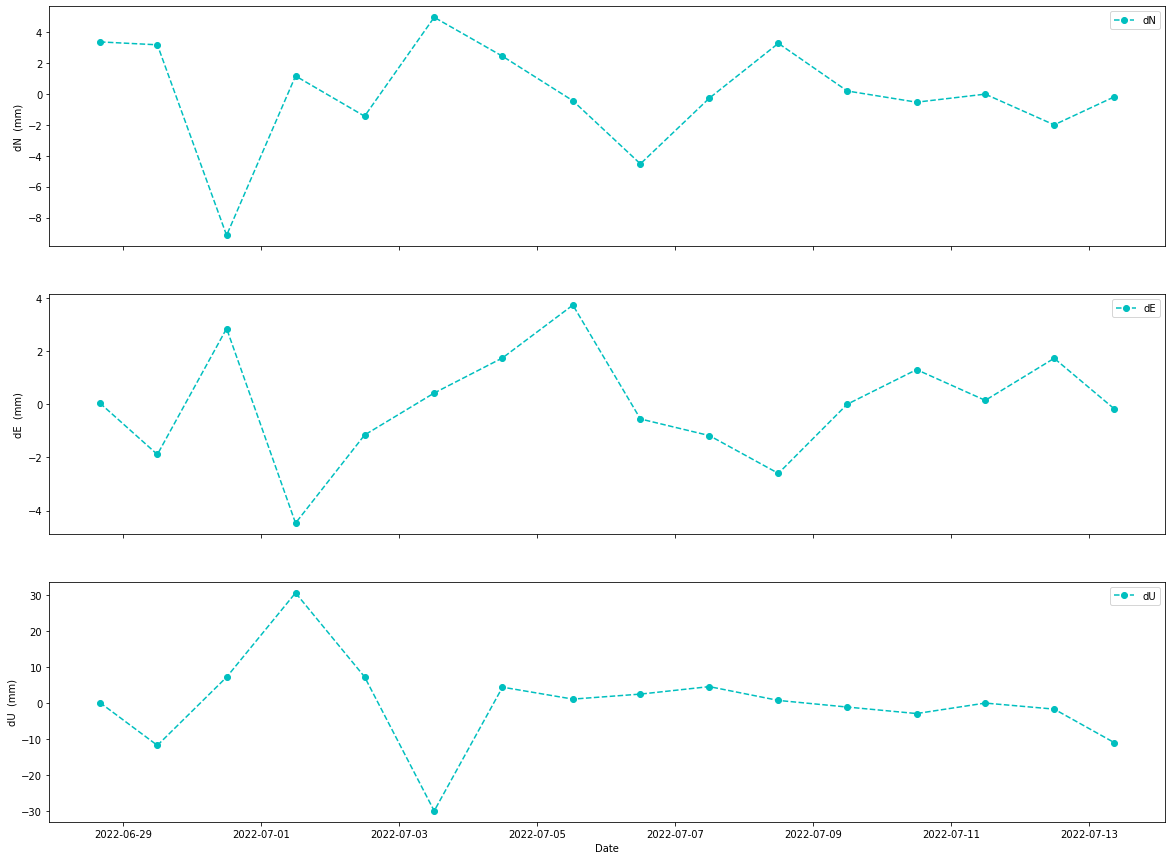

In [131]:
## make time series for the three axes
fig, axes = plt.subplots(3, 1, figsize=(20,15), sharex=True,)

plot_cols = ['dN', 'dE', 'dU' ]

data[plot_cols].plot(subplots=True, ax=axes, linestyle='--', marker='o', color='c')

month_day_formatter = mdates.DateFormatter("%Y-%m-%d")

for ax, col in zip(axes, plot_cols):
    # add axis labels
    ax.set_ylabel(col + '  (mm)')
    ax.set_xlabel('Date')
    ax.xaxis.set_major_formatter(month_day_formatter)

## Save the figure
## =================================================================================
#fig.savefig("Outputs/ts/timeseries_T8.png")
## =================================================================================